In [5]:
import os
import numpy as np
from Bio import SeqIO #library that lets you deal with sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import pandas as pd

In [2]:
print(os.listdir())

['merged_S12.fastq', 'sparkle_ngs_v4.ipynb', '21_S10_L001_R1_001.fastq', '22_S16_L001_R2_001.fastq', 'unmerged_S20.fastq', '24_S21_L001_R2_001.fastq', 'unmerged_S22.fastq', '2_S14_L001_R1_001.fastq', '17_S17_L001_R1_001.fastq', '10_S8_L001_R2_001.fastq', 'merged_S10.fastq', 'sparkle_ngs_v6.ipynb', '11_S6_L001_R1_001.fastq', '13_S5_L001_R2_001.fastq', 'sparkle_ngs_v2.ipynb', '.DS_Store', 'merged_S14.fastq', 'unmerged_S9.fastq', '8_S19_L001_R2_001.fastq', 'merged_S9.fastq', '18_S2_L001_R2_001.fastq', 'unmerged_S19.fastq', 'merged_S16.fastq', 'unmerged_S23.fastq', '19_S13_L001_R1_001.fastq', '20_S4_L001_R2_001.fastq', '6_S7_L001_R2_001.fastq', '12_S1_L001_R2_001.fastq', '1_S15_L001_R2_001.fastq', 'merged_S11.fastq', '16_S12_L001_R2_001.fastq', 'sparkle_ngs_v5.ipynb', '9_S18_L001_R1_001.fastq', 'merged_S13.fastq', '15_S20_L001_R1_001.fastq', 'unmerged_S21.fastq', 'unmerged_S18.fastq', '14_S23_L001_R2_001.fastq', 'merged_S8.fastq', 'merged_S17.fastq', 'unmerged_S8.fastq', 'merged_S15.fastq'

In [3]:
#create list of fastq files we will want to merge
fastq_list = []
f = 'fastq'

for i in os.listdir():
    if "fastq" in i:
        fastq_list.append(i)
             
fastq_list.sort()
print(fastq_list)
        

['10_S8_L001_R1_001.fastq', '10_S8_L001_R2_001.fastq', '11_S6_L001_R1_001.fastq', '11_S6_L001_R2_001.fastq', '12_S1_L001_R1_001.fastq', '12_S1_L001_R2_001.fastq', '13_S5_L001_R1_001.fastq', '13_S5_L001_R2_001.fastq', '14_S23_L001_R1_001.fastq', '14_S23_L001_R2_001.fastq', '15_S20_L001_R1_001.fastq', '15_S20_L001_R2_001.fastq', '16_S12_L001_R1_001.fastq', '16_S12_L001_R2_001.fastq', '17_S17_L001_R1_001.fastq', '17_S17_L001_R2_001.fastq', '18_S2_L001_R1_001.fastq', '18_S2_L001_R2_001.fastq', '19_S13_L001_R1_001.fastq', '19_S13_L001_R2_001.fastq', '1_S15_L001_R1_001.fastq', '1_S15_L001_R2_001.fastq', '20_S4_L001_R1_001.fastq', '20_S4_L001_R2_001.fastq', '21_S10_L001_R1_001.fastq', '21_S10_L001_R2_001.fastq', '22_S16_L001_R1_001.fastq', '22_S16_L001_R2_001.fastq', '24_S21_L001_R1_001.fastq', '24_S21_L001_R2_001.fastq', '2_S14_L001_R1_001.fastq', '2_S14_L001_R2_001.fastq', '3_S3_L001_R1_001.fastq', '3_S3_L001_R2_001.fastq', '4_S11_L001_R1_001.fastq', '4_S11_L001_R2_001.fastq', '5_S22_L001_R

In [30]:
#iterate through fastq list and merge paired-reads with bbmerge

index = 0
merged_list = []


while index < len(fastq_list):
    sample = fastq_list[index].split('_')[1]
    os.system(f'. /Users/allisonflores/Downloads/NGS-2/bbmap/bbmerge.sh 
              in1={fastq_list[index]} in2={fastq_list[index+1]} 
              out=merged_{sample}.fastq outu=unmerged_{sample}.fastq')
    merged_list.append('merged_' + sample + '.fastq')
    index += 2

In [3]:
#if merged files already exist, run to remake list of merged files
merged_list = []
for i in os.listdir():
    if "merged" in i and "unmerged" not in i:
        merged_list.append(i)
             
merged_list.sort()
print(merged_list)
        

['merged_S1.fastq', 'merged_S10.fastq', 'merged_S11.fastq', 'merged_S12.fastq', 'merged_S13.fastq', 'merged_S14.fastq', 'merged_S15.fastq', 'merged_S16.fastq', 'merged_S17.fastq', 'merged_S18.fastq', 'merged_S19.fastq', 'merged_S2.fastq', 'merged_S20.fastq', 'merged_S21.fastq', 'merged_S22.fastq', 'merged_S23.fastq', 'merged_S3.fastq', 'merged_S4.fastq', 'merged_S5.fastq', 'merged_S6.fastq', 'merged_S7.fastq', 'merged_S8.fastq', 'merged_S9.fastq']


In [6]:
'''PANDAS VERSION'''


wt = "GTTCCGTCAAGCTCCGGGGCGTGAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTACTACACAGACAGCGTACGCGGCCGTTTCACAATCTCGCGCGATAACGCGCGTAATACCGTGTATCTGCAAATGAATTCATTGCGTCCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACGATTACTGGGGCCAGGG"

#forward_part = "GGGGCGTGAACGTGAGTTTGTGGCG"
#forward_part_nok = "GGGGAAAGAACGTGAGTTTGTGGCG"

forward_part = "GAACGTGAGTTTGTGGCG" #shorter version inclusive of both

reverse_part = "CCCCAGTAATCGTAATC"

"""set up empty lists to count various occurances"""
i = 0
read_num = [0]*len(merged_list) #total reads per sample
counts_forward = [0]*len(merged_list) #num reads with forward primer(s)
counts_reverse = [0]*len(merged_list) #num reads with reverse primer

nok = [0]*len(merged_list) #num reads with specifically the no K forward primer

low_phred = [0]*len(merged_list) #reads tossed for low phred score
not_found = [0]*len(merged_list) #num reads where primers aren't found

seq_df = pd.DataFrame()
#well_dict = {} #wells = keys, where values = dict of read seq + # of appearances
not_found_list = []

def trim(sequence, primer):
    start = str(record.seq).find(primer)
    return str(record.seq)[start:start+208]

"""now let's iterate through the merged files and trim reads"""
for file in merged_list: #iterate through all the merged files
    
    prefix = file.split('.')[0]
    well_num = prefix.split('_')[1] #determine sample number, ex: S1
    
    well_dict[well_num] = {} #add well to overall dictionary 
    for record in tqdm(SeqIO.parse(file, 'fastq')): #iterate through all the reads
        read_num[i] += 1
        if np.mean(record.letter_annotations["phred_quality"]) >= 20: #only enter if high quality read
            
            sequence = str(record.seq)
            
            #forwardize all sequences
            if reverse_part in sequence:
                sequence = str(Seq(sequence).reverse_complement())
                counts_reverse[i] += 1
            
            if forward_part in sequence:
                counts_forward[i] += 1
                start = sequence.find(forward_part)
                sequence = sequence[start:start+208]
                
                if sequence in well_dict[well_num]:
                    well_dict[well_num][sequence] += 1
                else:
                    well_dict[well_num][sequence] = 1
            else:
                not_found[i] += 1
                not_found_list.append(sequence)
                
            
        else:
            low_phred[i] += 1
    #break    

    i += 1        
                


252151it [00:09, 25894.09it/s]
198711it [00:07, 25880.05it/s]
354372it [00:13, 25690.91it/s]
209420it [00:08, 25769.55it/s]
202062it [00:07, 25983.27it/s]
208002it [00:08, 25947.38it/s]
224050it [00:08, 25823.54it/s]
227975it [00:08, 25977.68it/s]
236882it [00:09, 25783.03it/s]
414853it [00:16, 25751.62it/s]
320414it [00:12, 25589.65it/s]
234862it [00:09, 26080.45it/s]
259627it [00:10, 25762.62it/s]
303823it [00:11, 25891.40it/s]
396846it [00:15, 25291.22it/s]
255802it [00:09, 25858.97it/s]
181058it [00:07, 25777.95it/s]
183693it [00:07, 25839.48it/s]
271549it [00:10, 25897.52it/s]
413532it [00:16, 25764.71it/s]
389490it [00:15, 25547.32it/s]
386789it [00:15, 25586.99it/s]
439883it [00:17, 25498.71it/s]


In [10]:
#convert to pandas dataframe and concatinate

big_df = pd.DataFrame()

working_df = pd.DataFrame(list(well_dict['S1'].items()), columns=['seq','S1'])
working_df = working_df.set_index('seq')
print(working_df)

for sample in well_dict.keys():
    working_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
    working_df = working_df.set_index('seq')
    conc_df = pd.concat([big_df, working_df], axis = 1 )
    big_df = conc_df
    
   


                                                    S1
seq                                                   
GAACGTGAGTTTGTGGCGACTATTCGTCGGTCTGGAGGCTGTACCTG...   3
GAACGTGAGTTTGTGGCGACTATTAGTGTGTCTGGCGGCGGTACCCG...   1
GAACGTGAGTTTGTGGCGACTATTATTGCGTCTGGCGGCATTACCTA...   1
GAACGTGAGTTTGTGGCGACTATTCTTATGTCTGGCGGCTTTACCCA...   1
GAACGTGAGTTTGTGGCGACTATTCGTCGGTCTGGCGGCCTTACCAT...   1
...                                                 ..
GAACGTGAGTTTGTGGCGACTATTCTTTGGTCTGGCGGCGGTACCCG...   1
GAACGTGAGTTTGTGGCGACTATTCATAGGTCTGGCGGCATTACCGT...   1
GAACGTGAGTTTGTGGCGACTATTGTTCCGTCTGGCGGCGTTACCGT...   1
GAACGTGAGTTTGTGGCGACTATTCATAGGTCTGGCGGCATTACCGT...   1
GAACGTGAGTTTGTGGCGACTATTTGTACGTCTGGCGGCCTTACCTT...   1

[194090 rows x 1 columns]


In [11]:
print(big_df)

                                                     S1  S10  S11  S12  S13  \
GAACGTGAGTTTGTGGCGACTATTCGTCGGTCTGGAGGCTGTACCTG...  3.0  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTAGTGTGTCTGGCGGCGGTACCCG...  1.0  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTATTGCGTCTGGCGGCATTACCTA...  1.0  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTCTTATGTCTGGCGGCTTTACCCA...  1.0  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTCGTCGGTCTGGCGGCCTTACCAT...  1.0  NaN  NaN  NaN  NaN   
...                                                 ...  ...  ...  ...  ...   
GAACGTGAGTTTGTGGCGACTATTCTTAGGTCTGGCGGCGGTACCGA...  NaN  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTCTTTGGTCTGGCGGCCATACCGT...  NaN  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTGATCCGTCTGGCGGCGGTACCGG...  NaN  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTCATACGTCTGGCGGCGTTACCGG...  NaN  NaN  NaN  NaN  NaN   
GAACGTGAGTTTGTGGCGACTATTCATGGGTCTGGCGGCTTTACCCG...  NaN  NaN  NaN  NaN  NaN   

                                                   

In [14]:
print(well_dict.keys())

dict_keys(['S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S2', 'S20', 'S21', 'S22', 'S23', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'])


In [21]:
#lets try to merge the dataframes together instead to only keep sequences that appear in all

#merged_df = pd.DataFrame()

run1 = ['S15', 'S8', 'S5', 'S12', 'S13', 'S16']
run2 = ['S7', 'S6', 'S23', 'S17', 'S4', 'S23']
run3 = ['S9', 'S1', 'S20', 'S2', 'S10', 'S21']

i = 1
for sample in run1:
    if i == 1:
        merged_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
        merged_df = merged_df.set_index('seq')
    else:
        working_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
        working_df = working_df.set_index('seq')
        df = pd.merge(merged_df, working_df, left_index=True, right_index=True)
        #df = pd.concat([merged_df, working_df], axis = 1 )
        merged_df = df
    i += 1
    
print(merged_df)
merged_df.to_csv('col1_conc.csv')   
   

                                                    S15     S8      S5    S12  \
seq                                                                             
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    3    245     182    477   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...  562  47296  180150  26785   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    1      4      15      2   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    2    732     248    100   
GAACGTGAGTTTGTGGCGACCATTGCCCTCTCTGGGAGCAGCACCTA...    1      7       4     10   
...                                                 ...    ...     ...    ...   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCCACCTA...    1     14      68     13   
GAACGTGAGTTTGTGGCGGCCATTGGCTTCTCTGGGAGCATCACCTA...    1     24       3      2   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    1    930     552    614   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    1      8      26      5   
GAACGTGAGTTTGTGGCGGCCATTAGCT

In [23]:
i = 1
for sample in run2:
    if i == 1:
        merged_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
        merged_df = merged_df.set_index('seq')
    else:
        working_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
        working_df = working_df.set_index('seq')
        df = pd.merge(merged_df, working_df, left_index=True, right_index=True)
        #df = pd.concat([merged_df, working_df], axis = 1 )
        merged_df = df
    i += 1
    
print(merged_df)
merged_df.to_csv('col2_conc.csv') 

                                                      S7    S6   S23_x   S17  \
seq                                                                            
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...  1994  2057  106841  1770   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...     1     1      48     2   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...     2     1      49     2   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    18    38     240    29   
GAACGTGAGTTTGTGGCGACTATTGTTACGTCTGGCGGCGGTACCGG...     2    49       1    20   
...                                                  ...   ...     ...   ...   
GAACGTGAGTTTGTGGCGACTATTGATTCGTCTGGCGGCAGTACCGG...     2    42       1    11   
GAACGTGAGTTTGTGGCGACTATTTTTGCGTCTGGCGGCCGTACCGG...     1    66       1   109   
GAACGTGAGTTTGTGGCGACTATTCATACGTCTGGCGGCAGTACCGG...     1    70       1    27   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCCACCTA...     1     1      42     1   
GAACGTGAGTTTGTGGCGACTATTTATACGTCTGGCGGCC

In [24]:
i = 1
for sample in run3:
    if i == 1:
        merged_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
        merged_df = merged_df.set_index('seq')
    else:
        working_df = pd.DataFrame(list(well_dict[sample].items()), columns=['seq',sample])
        working_df = working_df.set_index('seq')
        df = pd.merge(merged_df, working_df, left_index=True, right_index=True)
        #df = pd.concat([merged_df, working_df], axis = 1 )
        merged_df = df
    i += 1
    
print(merged_df)
merged_df.to_csv('col3_conc.csv') 

                                                     S9  S1  S20    S2    S10  \
seq                                                                             
GAACGTGAGTTTGTGGCGACTATTCATACGTCTGGCGGCTTTACCTG...   88   1    1     6      3   
GAACGTGAGTTTGTGGCGACTATTCATCGGTCTGGCGGCTGTACCGG...  184   1    1    11      6   
GAACGTGAGTTTGTGGCGACTATTAATCCGTCTGGCGGCATTACCGG...  132   4    1    11      7   
GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCGTTACCGG...  910  78   79  5145  23443   
GAACGTGAGTTTGTGGCGACTATTCATACGTCTGGCGGCGTTACCGG...  231   1    1     3      5   
...                                                 ...  ..  ...   ...    ...   
GAACGTGAGTTTGTGGCGACCATTGCCATCTCTGGGAGCATCACCTA...    1   2   68     1      2   
GAACGTGAGTTTGTGGCGACCATTGCCGTCTCTGGGACCATCACCTA...    1   1   37     2      1   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    2   4  121    12      8   
GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTA...    1   1   89     3      5   
GAACGTGAGTTTGTGGCGACTATTTCCT

In [46]:
i = 0

while i<10:
    print(not_found_list[i])
    i+=1

GCTCCGGGGAAAGAACGTGAGTTCGTGGCGACTATTCGTTGGTCTGGCGGCCTTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACAGTGTATCTGCAAATGAATTCATTGAAACCAGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACCTAGACCTCTGAGTCCAATTACGATTACGATTACTGGGGCCAGGG
ATGTGGGCTGCCTAGAAAGGCATGGATGAGAGAAGCCTGGAGACAGGGATCCCAGGGAAACGCCCATGCAATTAGTCTATTTCTGCTGCAAGTAAGCATGCATTTGTAGGCTTGATGCTTTTTTTCTGCTTCTCCAGCCCTGGCCTGGGTCAATCCTTGGGGCCCAGACTGAGCACGTGATGGCAGAGGAAAGGAAGCCCTGCTTCCTCCAGAGGGCGTCGCAGGACAGCTTTTCCTAGACAGGGGCTAGTATGTGCAGCTCCTGCACCGGGATACTGGTTGACAAGTTTGGCTGGG
TATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCCTCAACCACCAGCACGGGACCATGCCGAACCTGCATGACTACTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGAC
TATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCCTCAACCACCAGCACGGGACCATGCCGAACCTGCATGACTACTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGAC
CCCTGGCCCCAGTAGTCGTAATCGCGA

In [25]:
print('read_num: ' + str(read_num))
print('forward counts: ' + str(counts_forward))
print('no k: ' + str(nok))
print('reverse counts: ' + str(counts_reverse))
print('phred score too low: ' + str(low_phred))
print('primers not found: ' + str(not_found))

#read_num[1] == counts_forward[1] + counts_reverse[1] + not_found[1]

read_num: [252151, 198711, 354372, 209420, 202062, 208002, 224050, 227975, 236882, 414853, 320414, 234862, 259627, 303823, 396846, 255802, 181058, 183693, 271549, 413532, 389490, 386789, 439883]
forward counts: [240571, 183375, 230500, 195954, 187150, 196325, 212067, 207508, 220135, 294355, 224596, 218379, 247932, 277237, 292257, 239943, 170286, 172127, 257991, 292970, 283758, 272247, 331766]
no k: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
reverse counts: [101078, 86816, 92236, 93233, 85573, 87750, 93669, 96470, 106467, 125451, 102835, 102236, 122000, 131903, 117948, 113119, 76571, 81945, 127014, 132083, 113897, 112853, 143177]
phred score too low: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
primers not found: [11580, 15336, 123872, 13466, 14912, 11677, 11983, 20467, 16747, 120498, 95818, 16483, 11695, 26586, 104589, 15859, 10772, 11566, 13558, 120562, 105732, 114542, 108117]


In [1]:
print('read_num: ' + str(read_num))
print('forward counts: ' + str(counts_forward))
print('reverse counts: ' + str(counts_reverse))
print('primers not found: ' + str(not_found))

NameError: name 'read_num' is not defined

In [ ]:
#what if we want the reads in terms of frequencies?

#first convert well_dict to well_dict_freq

well_dict_freq = {}
for sample in well_dict.keys():
    freqs = {}
    well_dict_freq


In [10]:
print(well_num)
falses = 0
start_seq = 'GAACGTGAGT'
for i in list(well_dict['S1'].keys()):
    if i[0:10] != start_seq:
        falses += 1
print(falses)

S9
0


In [12]:
for i in range(5):
    print(list(well_dict['S1'])[i])
    i+=1

GAACGTGAGTTTGTGGCGACTATTCGTCGGTCTGGAGGCTGTACCTGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG
GAACGTGAGTTTGTGGCGACTATTAGTGTGTCTGGCGGCGGTACCCGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTAATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTAACTAGTGCTCTGAGTCCGATCCCGATTACG
GAACGTGAGTTTGTGGCGACTATTATTGCGTCTGGCGGCATTACCTATTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCAGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTCGCTAGGCCTCTGAGTACGATCACGATTACG
GAACGTGAGTTTGTGGCGACTATTCTTATGTCTGGCGGCTTTACCCATTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGTTGGGTTACTAGAACTCTGAGCACGATAACGATTACGA
GAACGTGAGTTTGTGGCGACTATTCGTCGGTCTGGCGGCCTTACCATTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGC

In [13]:
print(well_dict['S11'].values())

dict_values([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 582, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 211, 1, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1,

In [33]:
nok_wt = "GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTACTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG"
p1007 = "GAACGTGAGTTTGTGGCGACTATTCTTCGGTCTGGCGGCAGTACCTTTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG"
p1008 = "GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCATTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG"
p1009 = "GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCGTTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG"

part_p1007 = p1007[0:48]
part_p1008 = p1008[0:48]
part_p1009 = p1009[0:48]

print(part_p1007)

GAACGTGAGTTTGTGGCGACTATTCTTCGGTCTGGCGGCAGTACCTTT


In [19]:
sample_names = list(well_dict.keys())
smaller_well_dict = {}
wt_counts = {}
p1007_counts = {}
p1008_counts = {}
p1009_counts = {}
part_p1007_counts = {}
part_p1008_counts = {}
part_p1009_counts = {}

for sample in well_dict.keys():
    sample_dict = {}
    for seq, num in well_dict[sample].items():
        if num > 500:
            sample_dict[seq] = num
        if seq == nok_wt:
            wt_counts[sample] = num
        if seq == p1007:
            p1007_counts[sample] = num
        if seq == p1008:
            p1008_counts[sample] = num
        if seq == p1009:
            p1009_counts[sample] = num
        if seq[0:48] == part_p1007:
            if seq in part_p1007_counts.keys():
                new_num = part_p1007_counts[sample] + num
                part_p1007_counts[sample] == new_num
            else:
                print(sample)
                part_p1007_counts[sample] == num
        """if seq[0:48] == part_p1008:
            if sample in part_p1008_counts.keys():
                part_p1008_counts[sample] += num
            else:
                part_p1008_counts[sample] == num
        if seq[0:48] == part_p1009:
            if sample in part_p1009_counts.keys():
                part_p1009_counts[sample] += num
            else:
                part_p1009_counts[sample] == num"""
            
    smaller_well_dict[sample] = sample_dict
    
    



S1


KeyError: 'S1'

In [38]:
sample_names = list(well_dict.keys())
smaller_well_dict = {}

part_p1007_dict = {}
part_p1008_dict = {}
part_p1009_dict = {}

def front_find(original_dict, search):
    new_dict = {}
    for sample in original_dict.keys():
        current_counts = {}
        for seq, num in original_dict[sample].items():
            if seq[0:48] == search:  
                current_counts[seq] = num
        new_dict[sample] = current_counts
    return new_dict

part_p1007_dict = front_find(well_dict, part_p1007)
part_p1008_dict = front_find(well_dict, part_p1008)
part_p1009_dict = front_find(well_dict, part_p1009)

        
    
    
    
        
"""for sample in well_dict.keys():
    current_counts = {}
    for seq, num in well_dict[sample].items():
        if seq[0:48] == part_p1007:  
            current_counts[seq] = num
            
    part_p1007_dict[sample] = current_counts"""
    
    



'for sample in well_dict.keys():\n    current_counts = {}\n    for seq, num in well_dict[sample].items():\n        if seq[0:48] == part_p1007:  \n            current_counts[seq] = num\n            \n    part_p1007_dict[sample] = current_counts'

In [37]:
part_p1007_counts = {}

for sample in part_p1007_dict.keys():
    counts = sum(part_p1007_dict[sample].values())
    part_p1007_counts[sample] = counts

    
print(part_p1007_counts)

{'S1': 27, 'S10': 4, 'S11': 1, 'S12': 2, 'S13': 0, 'S14': 0, 'S15': 0, 'S16': 0, 'S17': 14, 'S18': 1, 'S19': 1, 'S2': 13, 'S20': 0, 'S21': 8, 'S22': 0, 'S23': 0, 'S3': 0, 'S4': 10, 'S5': 0, 'S6': 25, 'S7': 29, 'S8': 1, 'S9': 26}


In [39]:
part_p1008_counts = {}
for sample in part_p1008_dict.keys():
    counts = sum(part_p1008_dict[sample].values())
    part_p1008_counts[sample] = counts


print(part_p1008_counts)

{'S1': 65, 'S10': 14209, 'S11': 323, 'S12': 211, 'S13': 637, 'S14': 3, 'S15': 14, 'S16': 1637, 'S17': 19133, 'S18': 249, 'S19': 6, 'S2': 3815, 'S20': 84, 'S21': 38257, 'S22': 156, 'S23': 33, 'S3': 1, 'S4': 28652, 'S5': 41, 'S6': 671, 'S7': 45, 'S8': 58, 'S9': 511}


In [40]:
part_p1009_counts = {}

for sample in part_p1009_dict.keys():
    counts = sum(part_p1009_dict[sample].values())
    part_p1009_counts[sample] = counts

    
print(part_p1009_counts)

{'S1': 148, 'S10': 34282, 'S11': 850, 'S12': 581, 'S13': 1482, 'S14': 8, 'S15': 39, 'S16': 4855, 'S17': 40479, 'S18': 535, 'S19': 8, 'S2': 8398, 'S20': 114, 'S21': 104110, 'S22': 384, 'S23': 89, 'S3': 3, 'S4': 70160, 'S5': 98, 'S6': 1145, 'S7': 101, 'S8': 116, 'S9': 1368}


In [62]:
print(wt_counts)
print(p1007_counts)
print(p1008_counts)
print(p1009_counts)

{'S1': 568, 'S10': 838, 'S11': 786, 'S12': 26785, 'S13': 20360, 'S14': 371, 'S15': 562, 'S16': 19813, 'S17': 1770, 'S18': 54171, 'S19': 122403, 'S2': 1346, 'S20': 46725, 'S21': 549, 'S22': 76300, 'S23': 106841, 'S3': 64470, 'S4': 270, 'S5': 180150, 'S6': 2057, 'S7': 1994, 'S8': 47296, 'S9': 2954}
{'S17': 10, 'S19': 1, 'S21': 1, 'S4': 5, 'S6': 12, 'S9': 23}
{'S1': 35, 'S10': 9719, 'S11': 211, 'S12': 155, 'S13': 386, 'S14': 2, 'S15': 9, 'S16': 1016, 'S17': 14164, 'S18': 172, 'S19': 3, 'S2': 2306, 'S20': 59, 'S21': 25778, 'S22': 98, 'S23': 26, 'S4': 21086, 'S5': 28, 'S6': 314, 'S7': 7, 'S8': 35, 'S9': 346}
{'S1': 78, 'S10': 23443, 'S11': 582, 'S12': 395, 'S13': 900, 'S14': 7, 'S15': 30, 'S16': 3032, 'S17': 30303, 'S18': 372, 'S19': 5, 'S2': 5145, 'S20': 79, 'S21': 70372, 'S22': 250, 'S23': 72, 'S3': 2, 'S4': 52139, 'S5': 69, 'S6': 527, 'S7': 32, 'S8': 68, 'S9': 910}


In [43]:
total_counts = {}
i = 0
for k in well_dict.keys():
    total_counts[k] = counts_forward[i] + counts_reverse[i]
    i += 1
    
print(total_counts)

def counts_to_percentages(counts_dict, total):
    percents_dict = {}
    for k, v in counts_dict.items():
        percent = v/total[k]
        percents_dict[k] = percent
    return percents_dict
    
#print(wt_counts)    
wt_percents = counts_to_percentages(wt_counts, total_counts)
    
    
#print(wt_percents)
    
    

{'S1': 341649, 'S10': 270191, 'S11': 322736, 'S12': 289187, 'S13': 272723, 'S14': 284075, 'S15': 305736, 'S16': 303978, 'S17': 326602, 'S18': 419806, 'S19': 327431, 'S2': 320615, 'S20': 369932, 'S21': 409140, 'S22': 410205, 'S23': 353062, 'S3': 246857, 'S4': 254072, 'S5': 385005, 'S6': 425053, 'S7': 397655, 'S8': 385100, 'S9': 474943}
{'S1': 0.0016625249890969973}


In [44]:
part_p1007_percents = counts_to_percentages(part_p1007_counts, total_counts)
part_p1008_percents = counts_to_percentages(part_p1008_counts, total_counts)
part_p1009_percents = counts_to_percentages(part_p1009_counts, total_counts)

print("p1007: ")
print(part_p1007_percents)
print("p1008: ")
print(part_p1008_percents)
print("p1009: ")
print(part_p1009_percents)

p1007: 
{'S1': 7.902847659439951e-05, 'S10': 1.4804342113541902e-05, 'S11': 3.0985077586634276e-06, 'S12': 6.91594020478099e-06, 'S13': 0.0, 'S14': 0.0, 'S15': 0.0, 'S16': 0.0, 'S17': 4.2865628501968755e-05, 'S18': 2.382052662420261e-06, 'S19': 3.054078569225272e-06, 'S2': 4.054707359293857e-05, 'S20': 0.0, 'S21': 1.95532091704551e-05, 'S22': 0.0, 'S23': 0.0, 'S3': 0.0, 'S4': 3.935892188041185e-05, 'S5': 0.0, 'S6': 5.881619468630971e-05, 'S7': 7.29275376897059e-05, 'S8': 2.5967281225655675e-06, 'S9': 5.4743411314620913e-05}
p1008: 
{'S1': 0.0001902537399494803, 'S10': 0.05258872427282922, 'S11': 0.0010008180060482872, 'S12': 0.0007296316916043944, 'S13': 0.0023357032593510634, 'S14': 1.0560591393118015e-05, 'S15': 4.579114006855588e-05, 'S16': 0.005385258143681451, 'S17': 0.05858200500915487, 'S18': 0.0005931311129426449, 'S19': 1.8324471415351633e-05, 'S2': 0.011899006596696973, 'S20': 0.00022706875858265844, 'S21': 0.0935058904042626, 'S22': 0.00038029765605002375, 'S23': 9.346800278

In [66]:
p1007_percents = {}
for k, v in p1007_counts.items():
    percent = v/total_counts[k]
    p1007_percents[k] = percent
    
p1008_percents = {}
for k, v in p1008_counts.items():
    percent = v/total_counts[k]
    p1008_percents[k] = percent
    
p1009_percents = {}
for k, v in p1009_counts.items():
    percent = v/total_counts[k]
    p1009_percents[k] = percent
    
print("p1007: ")
print(p1007_percents)
print("p1008: ")
print(p1008_percents)
print("p1009: ")
print(p1009_percents)

p1007: 
{'S17': 3.0618306072834826e-05, 'S19': 3.054078569225272e-06, 'S21': 2.4441511463068875e-06, 'S4': 1.9679460940205925e-05, 'S6': 2.823177344942866e-05, 'S9': 4.842686385524158e-05}
p1008: 
{'S1': 0.00010244432151125863, 'S10': 0.03597085025037844, 'S11': 0.0006537851370779832, 'S12': 0.0005359853658705267, 'S13': 0.00141535550723628, 'S14': 7.040394262078677e-06, 'S15': 2.9437161472643063e-05, 'S16': 0.0033423471435432826, 'S17': 0.04336776872156325, 'S18': 0.00040971305793628486, 'S19': 9.162235707675816e-06, 'S2': 0.007192427054255103, 'S20': 0.0001594887709092482, 'S21': 0.06300532824949895, 'S22': 0.00023890493777501494, 'S23': 7.364145674130889e-05, 'S4': 0.08299222267703643, 'S5': 7.272632822950351e-05, 'S6': 0.00073873140526005, 'S7': 1.760319875268763e-05, 'S8': 9.088548428979485e-05, 'S9': 0.0007285084736484167}
p1009: 
{'S1': 0.00022830448793937638, 'S10': 0.0867645480419407, 'S11': 0.0018033315155421149, 'S12': 0.0013658981904442454, 'S13': 0.0033000517008099795, 'S1

In [52]:


for di in [p1007_counts, p1008_counts, p1009_counts]:
    i = 0
    for k, v in di.items():
        percent = v/total_counts[i]
        di[k] = percent
        i += 1
    
print(p1007_counts)
print(p1008_counts)
print(p1009_counts)


{'S17': 2.9269806146073893e-05, 'S19': 3.7010855283854754e-06, 'S21': 3.0985077586634276e-06, 'S4': 1.7289850511952475e-05, 'S6': 4.400068934413306e-05, 'S9': 8.096453401390478e-05}
{'S1': 0.00010244432151125863, 'S10': 0.03597085025037844, 'S11': 0.0006537851370779832, 'S12': 0.0005359853658705267, 'S13': 0.00141535550723628, 'S14': 7.040394262078677e-06, 'S15': 2.9437161472643063e-05, 'S16': 0.0033423471435432826, 'S17': 0.04336776872156325, 'S18': 0.00040971305793628486, 'S19': 9.162235707675816e-06, 'S2': 0.007192427054255103, 'S20': 0.0001594887709092482, 'S21': 0.06300532824949895, 'S22': 0.00023890493777501494, 'S23': 7.364145674130889e-05, 'S4': 0.08541787350571384, 'S5': 0.00011020498126515319, 'S6': 0.0008155738237165751, 'S7': 1.6468534512166718e-05, 'S8': 8.801599376343816e-05, 'S9': 0.0008984679304076863}
{'S1': 0.00022830448793937638, 'S10': 0.0867645480419407, 'S11': 0.0018033315155421149, 'S12': 0.0013658981904442454, 'S13': 0.0033000517008099795, 'S14': 2.4641379917275

In [68]:
for k, v in smaller_well_dict.items():
    print(k + ' - ' + str(len(v)))

print(smaller_well_dict['S10'])

S1 - 1
S10 - 6
S11 - 2
S12 - 19
S13 - 17
S14 - 0
S15 - 1
S16 - 17
S17 - 15
S18 - 13
S19 - 15
S2 - 4
S20 - 16
S21 - 19
S22 - 2
S23 - 6
S3 - 1
S4 - 15
S5 - 12
S6 - 3
S7 - 1
S8 - 10
S9 - 3
{'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCGTTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG': 23443, 'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCATTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG': 9719, 'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCCTTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG': 1128, 'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCTGTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATT

In [34]:
wild_type = 'TTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTACTACACAGACAGCGTACGCGGCCGTTTCACAATCTCGCGCGATAACGCGCGTAATACCGTGTATCTGCAAATGAATTCATTGCGTCCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTAC'
wild_type_with_k = 'TTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTACTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGCGTAATACCGTGTATCTGCAAATGAATTCATTGCGTCCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTAC'


for k, v in smaller_well_dict.items():
    print(k)
    print(v.keys())
    #for s in v.keys():
        #if s == wild_type or s == wild_type_with_k:
        #print(v[s])
    

S1
dict_keys(['GAACGTGAGTTTGTGGCGACTATTTCCTGGTCTGGGGGGTCTACCTACTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG'])
S10
dict_keys(['GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCGTTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG', 'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCATTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG', 'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCCTTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGAATTCATTGAAACCCGACGACACCGCAGTATATTATTGTGCAGCGGCGGGGTTGGGTACGTAGGTTTCTGAGTGGGATTACGATTACG', 'GAACGTGAGTTTGTGGCGACTATTGGTCCGTCTGGCGGCTGTACCGGTTACACAGACAGCGTAAAAGGCCGTTTCACAATCTCGCGCGATAACGCGAAGAATACCGTGTATCTGCAAATGA

In [86]:

print(smaller_well_dict['S1.fastq']['TAATCCCACTCAGAAACCTACGTACCCAACCCCGCCGCTGCACAATAATATACTGCGGTGTCGTCGGGTTTCAATGAATTCATTTGCAGATACACGGTATTCTTCGCGTTATCGCGCGAGATTGTGAAACGGCCTTTTACGCTGTCTGTGTAGTAGGTAGACCCCCCAGACCAGGAAATAGTCGCCACAAAC'])



KeyError: 'TAATCCCACTCAGAAACCTACGTACCCAACCCCGCCGCTGCACAATAATATACTGCGGTGTCGTCGGGTTTCAATGAATTCATTTGCAGATACACGGTATTCTTCGCGTTATCGCGCGAGATTGTGAAACGGCCTTTTACGCTGTCTGTGTAGTAGGTAGACCCCCCAGACCAGGAAATAGTCGCCACAAAC'

(array([1.13817e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000e+00, 1.09409e+04, 2.18808e+04, 3.28207e+04, 4.37606e+04,
        5.47005e+04, 6.56404e+04, 7.65803e+04, 8.75202e+04, 9.84601e+04,
        1.09400e+05]),
 <a list of 10 Patch objects>)

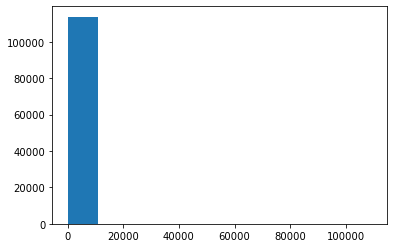

In [87]:
#print(well_num)
plt.hist(list(well_dict[well_num].values()))
#                     c += 1
#                     if c > 10:
#                         break
                    
    

In [120]:
#reverse_part = "CGATTACGATTACTGGGG"
reverse_primer = "CCCCAGTAATCGTAATC"
reversed_reverse_primer = "CGATTACGATTACTGGGG"
print(not_found_rev[4])

print(reverse_primer in not_found_rev[4])

CCCTGGCCCCAGTAATCGTAATCGACATCGAACTCAGAGGTCTAGCCACCCAACCCCGCCGCTGCAAATAATATACTGCGGTGTCGTCGGGTTTCAATGAATTCATTTGCAGATACACGGTATTCTTCGCGTTATCGCGCGAGATTGTGAAACGGCCTTTTACGCTGTCTGTGTAGTTGGTGCTGCCCCCAGAGCTGCTAATGGCCGCCACAAACTCACGTTCTTTCCCCGGAGC
True
